# Phoenix Nosecone Design

This notebook provides descriptions, equations and renderings for a nosecone similar to that used on the AIM-54 (Phoenix) missile. The notebook leverages several common packages such as matplotlib, numpy for data handling and 2D graphing and some less-common packages viewscad, solidpython and OpenSCAD for 3D rendering.

Our first step is to import these packages.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import viewscad
from solid import *

L = 408 # length base to tip
R = 95  # radius at base
S = 94  # shoulder diameter
M = 50  # mount length

# define an x axis the same length as the nose cone
x = np.linspace(0, L, int(L))

## Haack series

Comparing several different shapes with the original drawings of the nosecone, the Haack shape visually fit best. That choice would make sense from an engineering standpoint particularly with an L/D shape to minimize drag.

Unlike many other nose cone shapes, the Haack Series are mathematically derived for the purpose of minimizing drag. While the series is a continuous set of shapes determined by the value of $C$ in the equations below, two values of $C$ have particular significance: when $C = 0$, the notation $LD$ signifies minimum drag for the given length and diameter, and when $C = {1 \over 3}$, $LV$ indicates minimum drag for a given length and volume. The Haack series nose cones are not perfectly tangent to the body at their base except for the case where $C = {2 \over 3}$. However, the discontinuity is usually so slight as to be imperceptible. For $C > {2 \over 3}$, Haack nose cones bulge to a maximum diameter greater than the base diameter. Haack nose tips do not come to a sharp point, but are slightly rounded.

$\theta = \arccos \Bigl(1 - {2X \over L}\Bigr)$

$y = {R \over \sqrt{\pi}} \sqrt{\theta-{\sin({2\theta})\over2}+C \sin^3({\theta})}$

Where:

$C = {1 \over 3}$ for LV-Haack 

$C = 0$ for LD-Haack

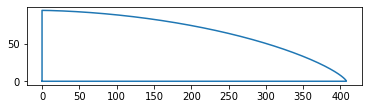

In [12]:
C = 1/3

f = lambda x: (R/np.sqrt(np.pi))*np.sqrt((np.arccos(1 - (2*x)/L)) - (np.sin(2 * (np.arccos(1 - (2*x)/L))))/2 + C * np.sin((np.arccos(1 - (2*x)/L)))**3)
y = f(x)

zero = np.array([0])
xplt = np.concatenate((zero, x, zero))
yplt = np.concatenate((zero, y[::-1], zero))

plt.axes().set_aspect("equal")    
plt.plot(xplt, yplt)

points = np.vstack((yplt, xplt)).T



The smoothing factor defines the number of segments used to render objects. As is often the case, the larger the number the more processing is required. I find 100 provides enough detail for practical use.

In [13]:
SMOOTH=100

This function adds origin coordinates to the arrays passed and plots a graph of the nosecone profile in 2 dimensions. The arrays are combined into an array of points and returned.

In [14]:
r = viewscad.Renderer()
p = rotate_extrude(360, segments=SMOOTH)(polygon(points))
if S != 0:
    p += translate([0, 0, -S])(cylinder(r=S, h=S, segments=SMOOTH))
        
if M != 0:
    p -= translate([0, 0, -S])(cylinder(r=M, h=S, segments=SMOOTH))

r.render(p, outfile='./' + 'phoenix_haak' + '.stl')

Geometries in cache: 6
Geometry cache size in bytes: 5954584
CGAL Polyhedrons in cache: 1
CGAL cache size in bytes: 103649640
Total rendering time: 0:01:00.551
   Top level object is a 3D object:
   Simple:        yes
   Vertices:    41101
   Halfedges:  241952
   Edges:      120976
   Halffacets: 159758
   Facets:      79879
   Volumes:         2
